# An Analysis of DUI's Issued in Ames, Iowa

This project is an analysis of DUI's issued by police in Ames, Iowa between years 2013 and 2017. 

Ames is a college town and tickets were issued either by the **Iowa State University's Police Department** or by the **Ames Police Department**. The dataset includes information about the **time** the tickets were issued, the **police department** that issued the ticket and finally **gender** and **blood alcohol concentration levels** (two readings) of the recipients for 1556 cases.

We will take a look if **gender**, **time of the day**, and **month of the year** play a role in the number of tickets issued. Eventually we will decide whether Ames' being a college town plays a role in increased number of tickets.

In [1]:
#Import necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Set styles for pyplot and seaborn
plt.style.use('classic')
sns.set_style('ticks')

In [2]:
#Read the dataset 
breath = pd.read_csv('breath_alcohol_ames.csv')
print("The data set has {} entries and {} columns.".format(breath.shape[0], breath.shape[1]))
display(breath.head())
breath.info()

The data set has 1556 entries and 8 columns.


,year,month,day,hour,location,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1556 non-null   int64  
 1   month     1556 non-null   int64  
 2   day       1556 non-null   int64  
 3   hour      1556 non-null   int64  
 4   location  1556 non-null   object 
 5   gender    1527 non-null   object 
 6   Res1      1556 non-null   float64
 7   Res2      1556 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 97.4+ KB


## DUI's Issued over the Years:
First, let's take a look at how number of DUI's has changed over the years. 

Text(0, 0.5, "Number of DUI's")

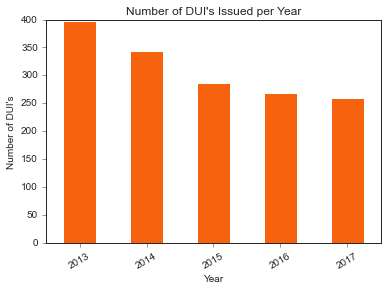

In [13]:
#Count number of DUI's Issued per year:
yearly = breath.year.value_counts().rename_axis('year').to_frame('DUI\'s issued')
#Plot the result as a bar plot
yearly.plot.bar(rot=30, color='#f6620e', legend=None)
yearly.head()
plt.title('Number of DUI\'s Issued per Year')
plt.xlabel('Year')
plt.ylabel('Number of DUI\'s')

Apparently since 2013 people have been getting fewer DUI tickets. 

## DUI's Issued per Gender:

Let's see if gender plays a role in getting tickets for driving under the influence.

First, let's see if need to clean the data. We see below that in 29 cases the gender wasn't specified. We need to get rid of those cases to analyze how gender plays a role in getting tickets.

In [4]:
#Count the number of cases where gender wasn't specified:
display(breath.isnull().sum())
#Get rid of the data where gender wasn't specified
gender = breath.dropna(subset=['gender'])
display(gender.isnull().sum())

year         0
month        0
day          0
hour         0
location     0
gender      29
Res1         0
Res2         0
dtype: int64

year        0
month       0
day         0
hour        0
location    0
gender      0
Res1        0
Res2        0
dtype: int64

Counting the male and female offenders, we see that the number of males are almost three times that of females. 

,Gender,Number of DUI's issued
0,M,1102
1,F,425


Text(0, 0.5, "Number of DUI's")

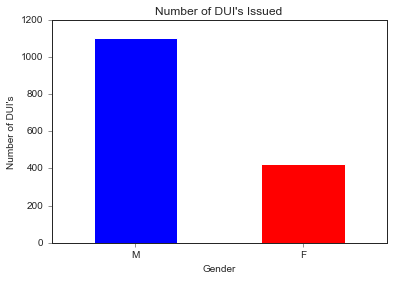

In [15]:
#Count the number of stops per gender:
split_by_gender = gender['gender'].value_counts().rename_axis('Gender').\
                                    to_frame('Number of DUI\'s issued').reset_index(level='Gender')
display(split_by_gender)
#Plot 
split_by_gender.plot.bar('Gender', 'Number of DUI\'s issued', color=['blue','red'], rot=0, legend=None)
plt.title('Number of DUI\'s Issued')
plt.ylabel('Number of DUI\'s')

Let's see if this is a trend we see over the years.

The following graph shows that in general, female behavior is similar to that of their male counterparts throughout the years, except fewer females follow the suit.

Text(0.5, 0, 'Year')

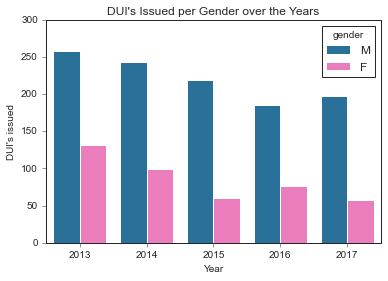

In [6]:
#Count the number of tickets per gender per year
gender_split_by_year = gender.groupby('year')['gender'].value_counts()
#Create a DataFrame
gender_split_by_year = gender_split_by_year.to_frame()
#Correctly identify columns
gender_split_by_year.rename(columns={'gender': 'DUI\'s issued'}, inplace=True)
#Reset multilevel index in two steps 
gender_split_by_year  = gender_split_by_year.reset_index(level= 'gender')
gender_split_by_year  = gender_split_by_year.reset_index(level= 'year')
#Plot the data 
sns.barplot(data=gender_split_by_year, x='year', y='DUI\'s issued',hue='gender',\
                        palette={'M':'#1776ab', 'F':'#fd6bbe'}).\
                        set(title='DUI\'s Issued per Gender over the Years')
plt.xlabel('Year')

## Blood Alcohol Levels per Gender:
Let's turn our attention to each gender's blood alcohol concentration levels. The data comprise of two alcohol concentration tests for each person. We will take the average of these tests to make the analysis easier. 

In the following boxplot, we see that women's average blood alcohol concentration level is slightly higher than that of men's. They have more outliers in the higher concentration cohort. Even the first quartile starts at a higher level than that of men's. Why is that?
One plausible explanation may be, women's bodies are smaller in general. So, the same amount of alcohol may be detected at higher concentration levels in their bloodstream. Also, they are much more likely to skip a meal or eat less than men, so drinks will be absorbed into the bloodstream faster and at higher concentrations. 
More information can be found <a href="https://www.winchesterhospital.org/health-library/article?id=157010">here</a>. 

Text(0.5, 1.0, 'Blood Alcohol Concentration per Gender')

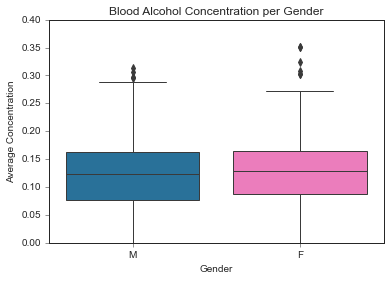

In [7]:
#Get the average of two reads:
average = gender.assign(Avg_con=lambda row: (row['Res1']+row['Res2'])/2)
#Plot the average concentration levels per gender:
ax = sns.boxplot('gender', 'Avg_con', data=average, palette=['#1776ab', '#fd6bbe'])
ax.set_xlabel('Gender')
ax.set_ylabel('Average Concentration')
ax.set_title('Blood Alcohol Concentration per Gender')

## Time of the Day DUI's were Issued the Most:
So far, we explored how gender played a role in getting DUI tickets. Now, let's shift our attention to when they were issued more. In the following bar graph, we see that night hours are the busiest. Especially around 2 a.m. there is a big spike.

Text(0, 0.5, "Number of DUI's")

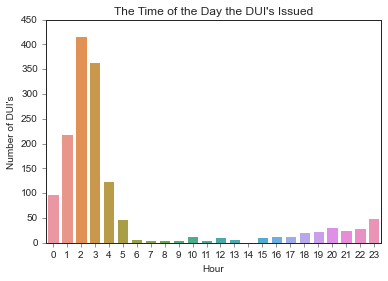

In [8]:
#Create a dataframe that groups tickets by the hour they were issued at
by_hour = breath.groupby(['hour']).size().to_frame().reset_index()
by_hour.rename(columns={'hour':'Hour', 0:'Numbers'}, inplace=True)
sns.barplot(x='Hour',y='Numbers', data=by_hour).set(title='The Time of the Day the DUI\'s Issued')
plt.ylabel('Number of DUI\'s')

## Month of the Year the DUI\'s Issued the Most:
Let's see if there is any meaningful fluctuation in the number of DUI's throughout the months of the year. 

From the bar graph below, we gather that whenever students come back from their hometowns, there is an increase in the number of  DUI's. After Christmas break, we see there is an increase in January (new year's party?). After summer break, we see an increase in August. Also, during April there is an increase as well which coincides with the spring break. **Since increased number of DUI's coincides with the yearly schedule of the students, we may infer that students are more likely to get DUI's than town's regular residents.** Let's delve deeper into this.

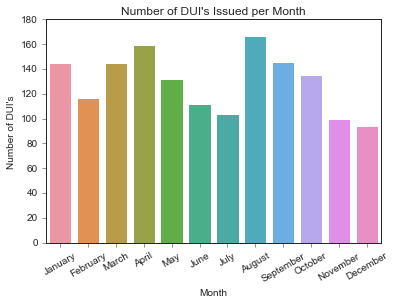

In [19]:
#Create a dataframe that groups tickets by the month there were issued at
by_month = breath.groupby(['month']).size().to_frame().reset_index()
by_month.rename(columns={'month':'Month',0:'Number of DUI\'s'}, inplace=True)
ax = sns.barplot(x='Month', y='Number of DUI\'s', data=by_month)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October', 'November','December']
ax.set_xticklabels(months, rotation=30)
ax.set_title('Number of DUI\'s Issued per Month')
plt.show()

## Who Gets More Tickets; Students or Town Residents?

In this <a href="https://en.wikipedia.org/wiki/Ames,_Iowa">Wikipedia </a> article, Ames is described as:
"In 2020, Ames had a population of 66,427, making it the state's ninth largest city. Iowa State University was home to 33,391 students as of fall 2019 which make up approximately one half of the city's population." 

In the graph above, it looks like Ames' half of population being students plays a role in the number of tickets issued for DUI's. Let's check this by looking at which police department issued more tickets.


,Police Department,# of tickets issued
0,ISU PD,940
1,Ames PD,616


[Text(0.5, 1.0, 'Number of Tickets Issued by Each Police Department')]

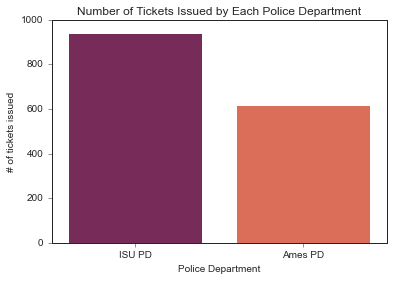

In [18]:
#Count the number of tickets issued by each police department
department = breath.location.value_counts()
dep_frame = department.to_frame().reset_index()
dep_frame.rename(columns={'index':'Police Department','location':'# of tickets issued'}, inplace=True)
display(dep_frame)
sns.barplot('Police Department', '# of tickets issued', data=dep_frame, palette='rocket')\
.set(title='Number of Tickets Issued by Each Police Department')


It looks like the Iowa State University's Police Department issued about one third more tickets than what Ames Police Department did. 

Therefore, we can safely claim that college students are responsible for the bigger share of DUI's issued in this small town. 